In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df_2019=pd.read_csv('2019.csv')

In [4]:
df_2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [7]:
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
df_2019.style.apply(highlight_max) # without subset

In [11]:
df_2019.shape

(156, 9)

<function matplotlib.pyplot.show(*args, **kw)>

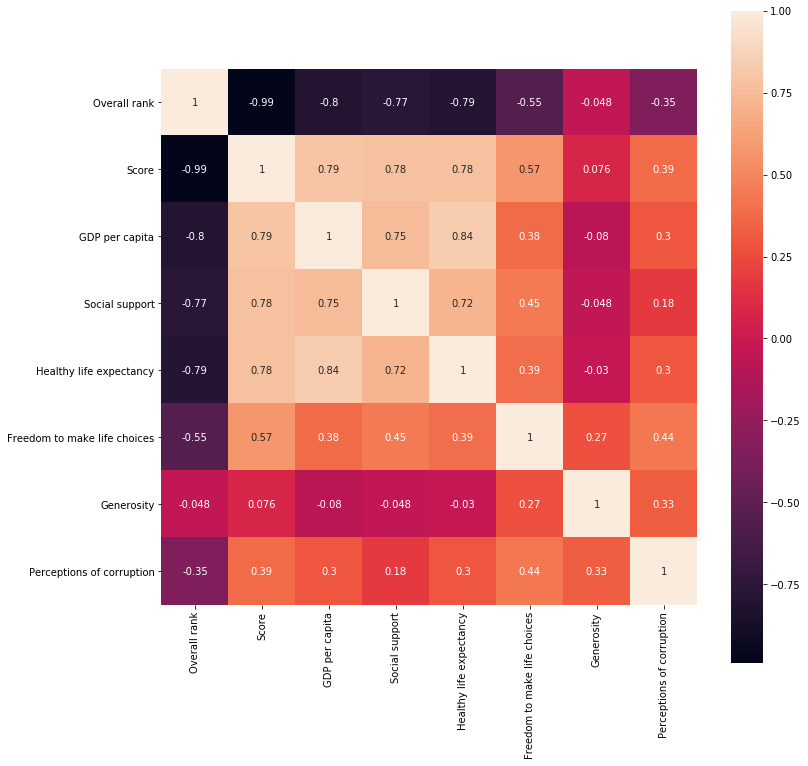

In [17]:
figure=plt.figure(figsize=(12,12))
sns.heatmap(df_2019.corr(),square=True,annot=df_2019.corr())
plt.show

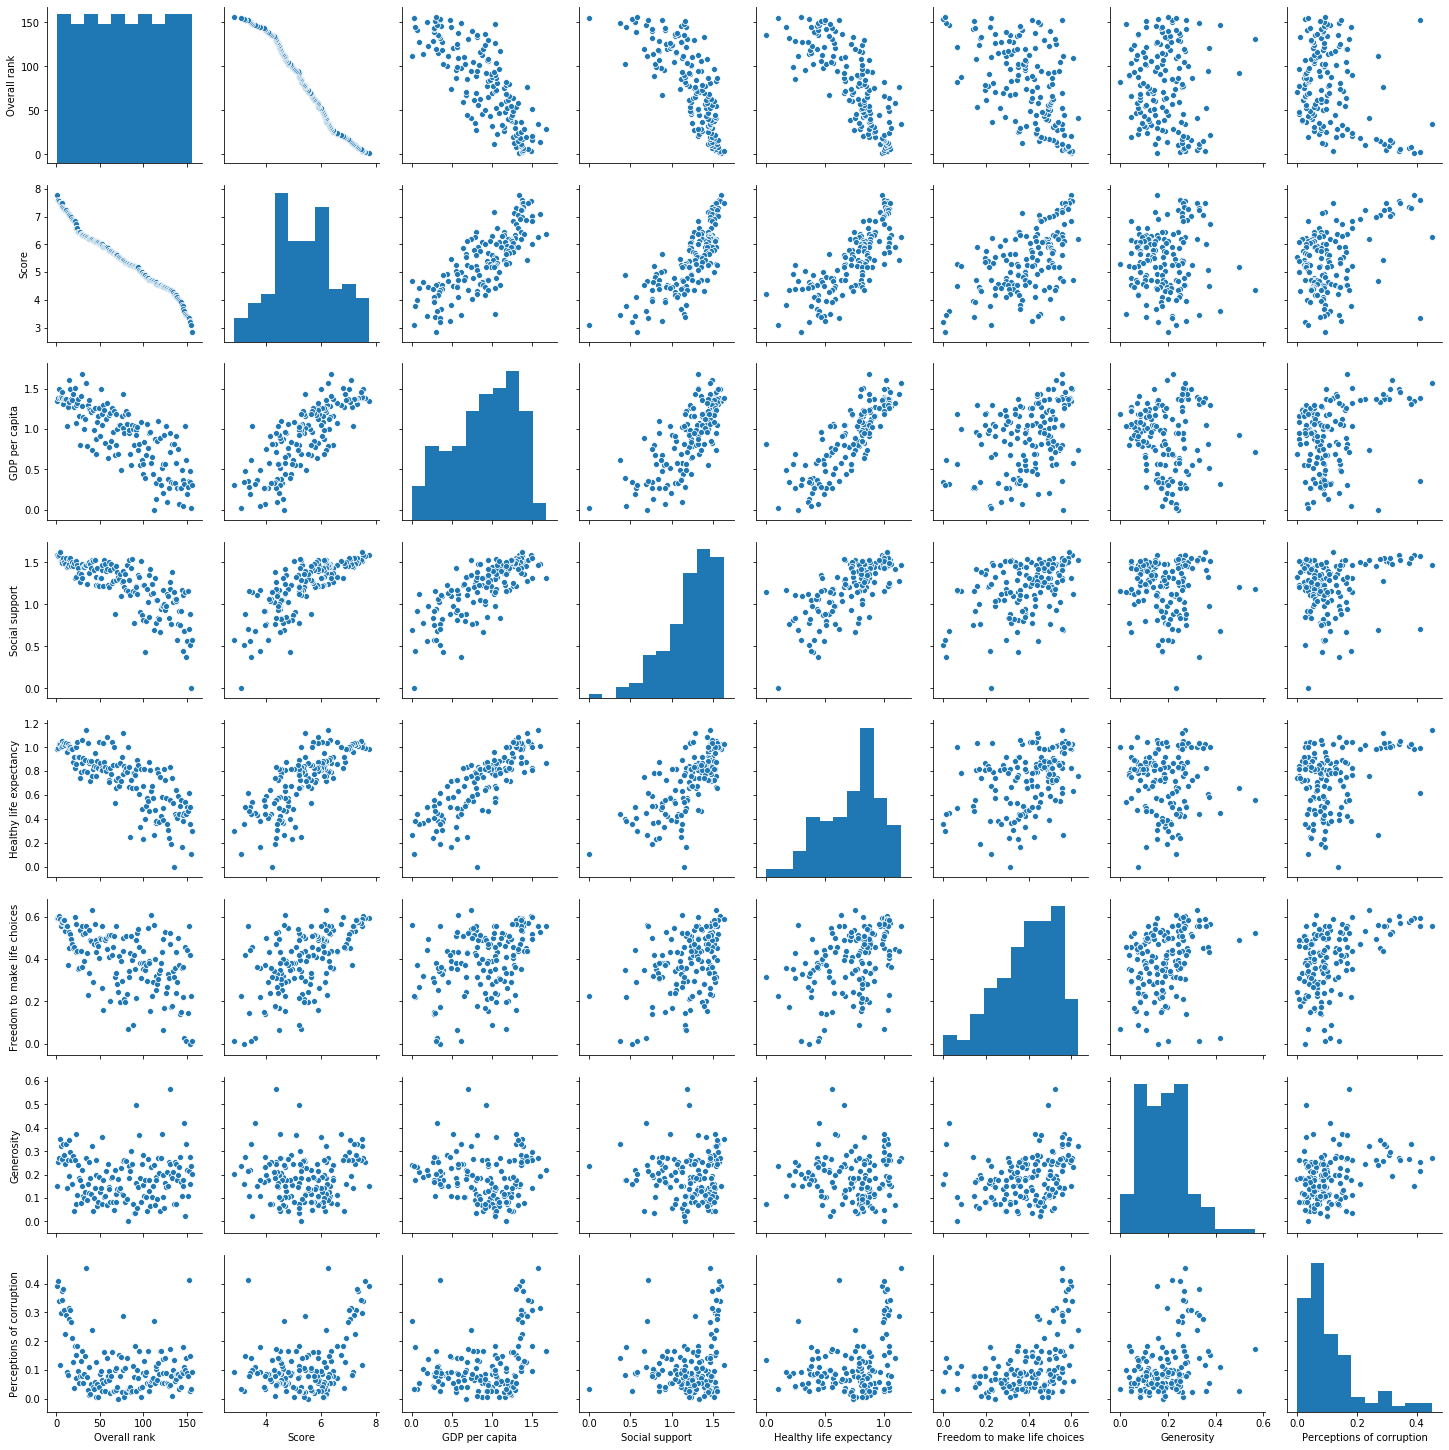

In [19]:
sns.pairplot(df_2019)

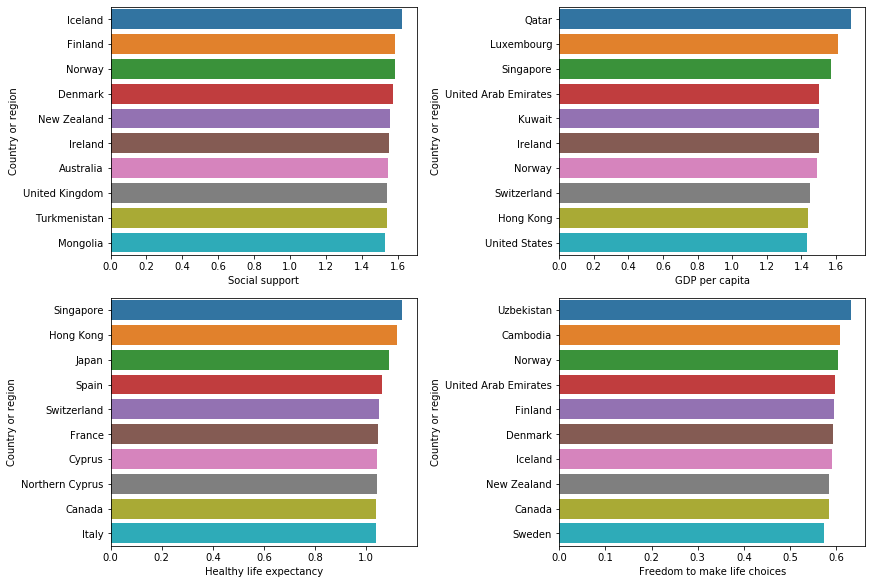

In [54]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8),constrained_layout=True)
sns.barplot(x='Social support' ,y='Country or region',data=df_2019.nlargest(10,'Social support'),ax=axes[0,0])

sns.barplot(x='GDP per capita' ,y='Country or region',data=df_2019.nlargest(10,'GDP per capita'),ax=axes[0,1])

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df_2019.nlargest(10,'Healthy life expectancy'),ax=axes[1,0])

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df_2019.nlargest(10,'Freedom to make life choices'),ax=axes[1,1])


<BarContainer object of 10 artists>

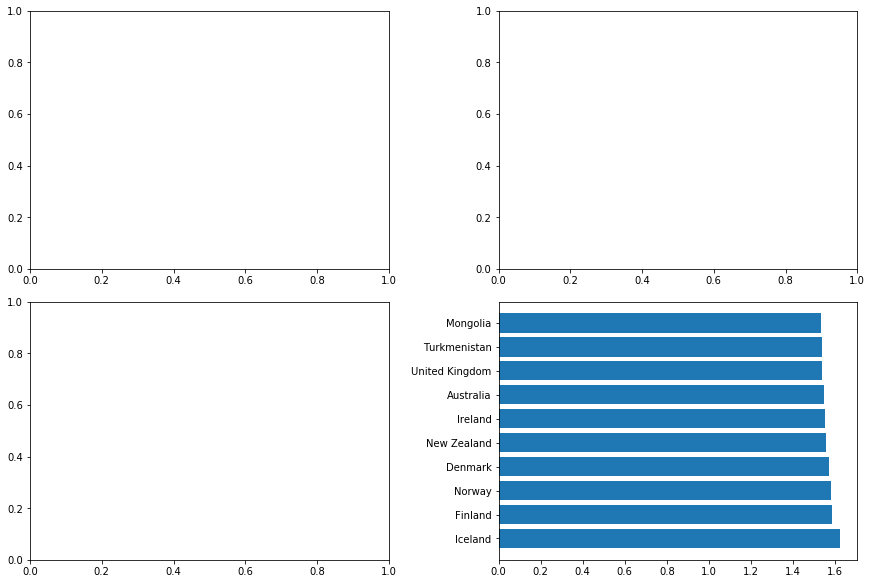

In [62]:
fig,axes=plt.subplots(nrows=2,ncols=2,constrained_layout=True,figsize=(12,8))
plt.barh(width='Social support',y='Country or region', data=df_2019.nlargest(10,'Social support'))

In [63]:
# Giving each country a range as per score- this wil be high/mid/low.

In [68]:
print('Min {}'.format(df_2019['Score'].min()))
print('Max {}'.format(df_2019['Score'].max()))
df_2019.Score.mean()

Min 2.853
Max 7.769


5.407096153846153

In [46]:
diff=df_2019['Score'].max()-df_2019['Score'].min()

In [47]:
grp=round(diff/3,3)
print(grp)

1.639


In [48]:
low=df_2019['Score'].min()+grp

In [49]:
Mid=low+grp


In [50]:
Mid

6.131

Adding a new column by the name of Category

In [51]:
df_2019['Category']=np.where(df_2019['Score']<low,'Low',np.where(df_2019<Mid & df_2019>Low,'Mid','High'))

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [ ]:
df_2019.tail(20)

In [52]:
cat=[]
for i in df_2019.Score:
    if i<=low:
        cat.append('Low')
    elif (i>low and i<=Mid):
        cat.append('Mid')
    else: 
        cat.append('High')

In [53]:
df_2019['Category']=cat

In [54]:
df_2019.tail(100)

Overall rank         Country or region  Score  GDP per capita  \
56             57                 Mauritius  5.888           1.120   
57             58                     Japan  5.886           1.327   
58             59                  Honduras  5.860           0.642   
59             60                Kazakhstan  5.809           1.173   
60             61                   Bolivia  5.779           0.776   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
56            1.402                    0.798                         0.498   
57            1.419                    1.088                         0.445   
58            1.236                    0.828                         0.507   
59            1.508                    0.729                         0.410   
60            1.209                    0.706                         0.511   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption Category  
56        0.215                      0.060      Mid  
57        0.069                      0.140      Mid  
58        0.246                      0.078      Mid  
59        0.146                      0.096      Mid  
60        0.137                      0.064      Mid  
..          ...                        ...      ...  
151       0.217                      0.411      Low  
152       0.276                      0.147      Low  
153       0.158                      0.025      Low  
154       0.235                      0.035      Low  
155       0.202                      0.091      Low  

[100 rows x 10 columns]

In [55]:
#Comparing India

In [56]:
d=df_2019[df_2019['Country or region'].isin(['India','Canada','United Kingdom','United States'])]

In [57]:
d

Overall rank Country or region  Score  GDP per capita  Social support  \
8               9            Canada  7.278           1.365           1.505   
14             15    United Kingdom  7.054           1.333           1.538   
18             19     United States  6.892           1.433           1.457   
139           140             India  4.015           0.755           0.765   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
8                      1.039                         0.584       0.285   
14                     0.996                         0.450       0.348   
18                     0.874                         0.454       0.280   
139                    0.588                         0.498       0.200   

     Perceptions of corruption Category  
8                        0.308     High  
14                       0.278     High  
18                       0.128     High  
139                      0.085      Low

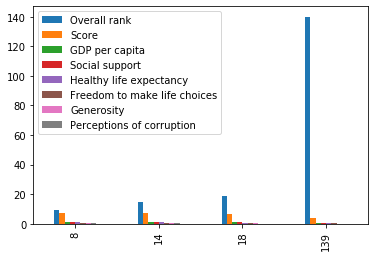

In [58]:
d.plot(kind='bar')

Geographic Visualization

In [117]:
import plotly.graph_objs as go
from plotly.offline import iplot

data=dict(type='cloropleth',
         locations=df_2019['Country or region'],
         locationmode='country names',
         colorscale='RdYlGn',
         z=df_2019['Score'],
         text=df_2019['Country or region'],
         colorbar={'title':'Happiness Score'})


layout=dict(title='Geographical Visualization of Happiness score',geo=dict(showframe=True,projection={'type':'azimuthal equal area'}))

choromap3=go.Figure(data= [data],layout=layout)
iplot(choromap3)

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [{'type': 'cloropleth', 'locations': 0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object, 'locationmode': 'country names', 'colorscale': 'RdYlGn', 'z': 0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64, 'text': 0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object, 'colorbar': {'title': 'Happiness Score'}}]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

In [119]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df_2019['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df_2019['Score'], 
           text = df_2019['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

Checking out previous happiness reports to see changes in attribute distribution

In [120]:
df_15=pd.read_csv('2015.csv')
df_16=pd.read_csv('2016.csv')
df_17=pd.read_csv('2017.csv')
df_18=pd.read_csv('2018.csv')

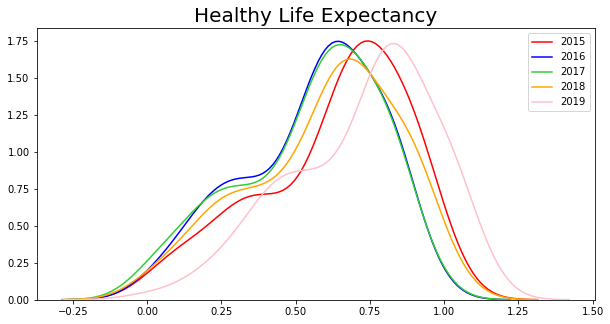

In [130]:
plt.figure(figsize=(10,5))
sns.kdeplot(df_15['Health (Life Expectancy)'],color='red',label='2015')
sns.kdeplot(df_16['Health (Life Expectancy)'],color='blue',label='2016')
sns.kdeplot(df_17['Health..Life.Expectancy.'],color='limegreen',label='2017')
sns.kdeplot(df_18['Healthy life expectancy'],color='orange',label='2018')
sns.kdeplot(df_2019['Healthy life expectancy'],color='pink',label='2019')
plt.title('Healthy Life Expectancy',size=20)
plt.legend
plt.show()

TypeError: plot got an unexpected keyword argument 'y'

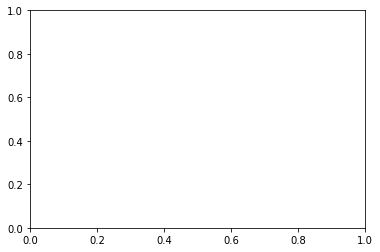

In [148]:
df_15['Year']=2015
print(df_15.shape)
df_16['Year']=2016
print(df_16.shape)
df_17['Year']=2017
df_18['Year']=2018

(158, 13)
(157, 14)


In [135]:
df_2019['Year']=2019


In [143]:
df_2019=pd.concat([df_15,df_16],axis=0)

In [144]:
df_2019

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
152            3.484             NaN                   0.39499  0.10419   
153            3.360             NaN                   0.38227  0.11037   
154            3.303             NaN                   0.28123  0.00000   
155            3.069             NaN                   0.74719  0.14866   
156            2.905             NaN                   0.06831  0.23442   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
152                   0.21028  0.39747                        0.06681   
153                   0.17344  0.16430                        0.07112   
154                   0.24811  0.34678                        0.11587   
155                   0.62994  0.06912                        0.17233   
156                   0.15747  0.04320                        0.09419   

     Generosity  Dystopia Residual  Year  Lower Confidence Interval  \
0       0.29678            2.51738  2015                        NaN   
1       0.43630            2.70201  2015                        NaN   
2       0.34139            2.49204  2015                        NaN   
3       0.34699            2.46531  2015                        NaN   
4       0.45811            2.45176  2015                        NaN   
..          ...                ...   ...                        ...   
152     0.20180            2.10812  2016                      3.404   
153     0.31268            2.14558  2016                      3.288   
154     0.17517            2.13540  2016                      3.192   
155     0.48397            0.81789  2016                      2.936   
156     0.20290            2.10404  2016                      2.732   

     Upper Confidence Interval  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
..                         ...  
152                      3.564  
153                      3.432  
154                      3.414  
155                      3.202  
156                      3.078  

[315 rows x 15 columns]

In [1]:
#Hierarical Clustering

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [16]:
SS=StandardScaler()
norm_data=normalize(df_2019)

In [9]:
df_2019=df_2019.drop(['Country or region','Overall rank'],axis=1)

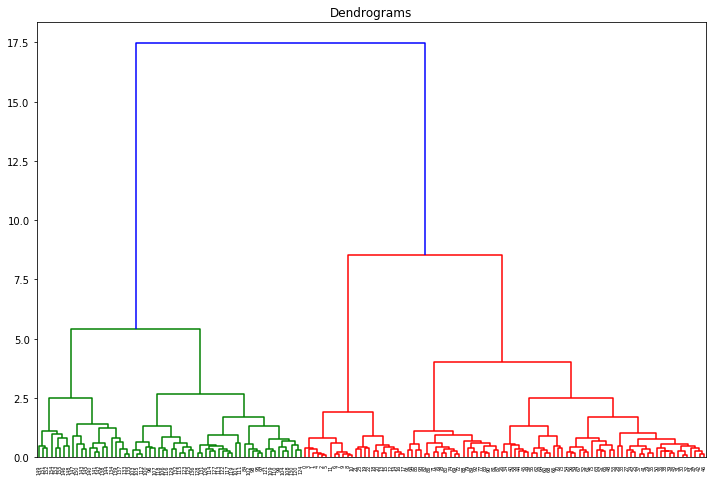

In [10]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
plt.title('Dendrograms')
dend=sch.dendrogram(sch.linkage(df_2019,method='ward'))

In [11]:
data_scaled=SS.fit_transform(df_2019)

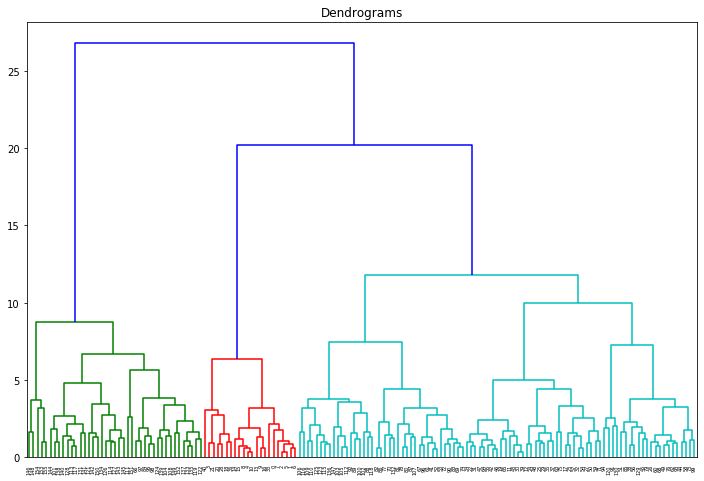

In [12]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
plt.title('Dendrograms')
dend=sch.dendrogram(sch.linkage(df_2019,method='ward'))

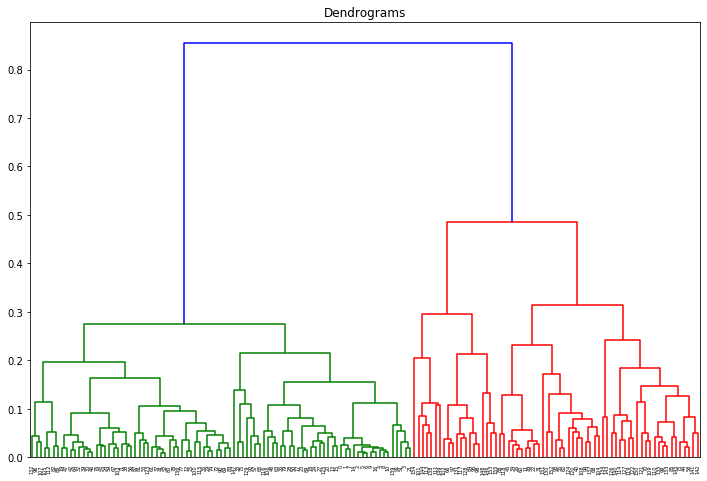

In [17]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
plt.title('Dendrograms')
dend=sch.dendrogram(sch.linkage(norm_data,method='ward'))

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(norm_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [20]:
plt.scatter(norm_data['GDP per capita'],norm_data['Perceptions of corruption'],c=cluster.labels_)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

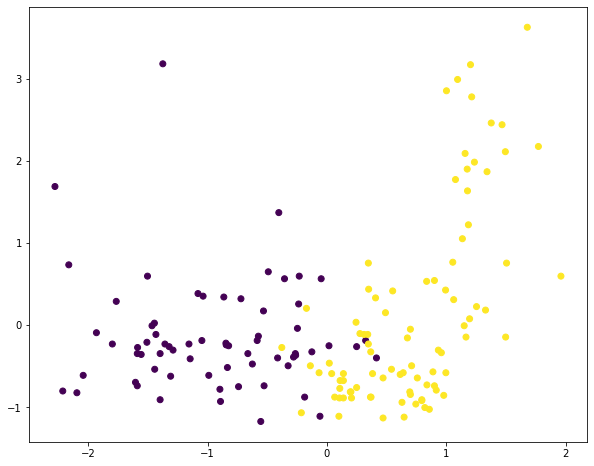

In [34]:
plt.figure(figsize=(10,8))
plt.scatter(data_scaled['GDP per capita'], data_scaled['Perceptions of corruption'],c=cluster.labels_)
plt.show()

In [30]:
norm_data

array([[0.9550195 , 0.16472212, 0.19508508, ..., 0.07326446, 0.01880782,
        0.04831029],
       [0.95207674, 0.17325291, 0.19705483, ..., 0.07416177, 0.03156886,
        0.05136203],
       [0.94878312, 0.18689294, 0.19869935, ..., 0.07573686, 0.03403763,
        0.04282963],
       ...,
       [0.97442048, 0.10647742, 0.15728236, ..., 0.        , 0.04806695,
        0.00760553],
       [0.9938098 , 0.00838114, 0.        , ..., 0.0725291 , 0.07575261,
        0.0112823 ],
       [0.96725314, 0.10374324, 0.19494236, ..., 0.0033903 , 0.0684841 ,
        0.03085175]])

In [32]:
data_scaled = pd.DataFrame(data_scaled, columns=df_2019.columns)

In [36]:
X=data_scaled[['Social support','Healthy life expectancy']]

In [35]:
#K-Means Clustering

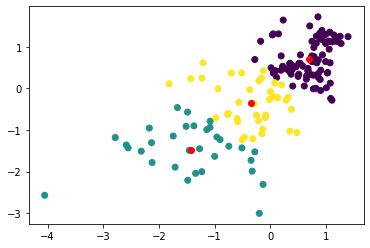

In [40]:
X=data_scaled[['Social support','Healthy life expectancy']]

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
centroids=kmeans.cluster_centers_

plt.scatter(X['Social support'], X['Healthy life expectancy'],c=kmeans.labels_)
plt.scatter(centroids[:,0],centroids[:,1],c='red')
plt.show()